In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
hf = h5py.File('higgs_100000_pt_250_500.h5','r')
hf1 = h5py.File('qcd_100000_pt_250_500.h5','r')

In [3]:
higgs_data = np.array(hf.get('higgs_100000_pt_250_500'))
qcd_data = np.array(hf1.get('qcd_100000_pt_250_500'))

In [4]:
higgs_table = pd.DataFrame(higgs_data)
qcd_table = pd.DataFrame(qcd_data)

In [5]:
higgs_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [6]:
qcd_table.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

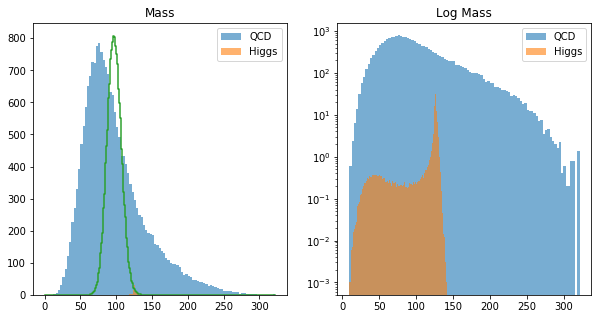

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass')
ax[0].hist(qcd_table['mass'],alpha=.6,bins=100,weights = 20000*np.ones(len(qcd_table['mass']))/len(qcd_table['mass']) , label = 'QCD')
ax[0].hist(higgs_table['mass'],alpha=.6,bins=100,weights = 100*np.ones(len(higgs_table['mass']))/len(higgs_table['mass']) , label = 'Higgs')
ax[0].step(np.arange(0,1+qcd_table['mass'].max()),20000*stats.poisson.pmf(np.arange(0,1+qcd_table['mass'].max()),qcd_table['mass'].mean()))
ax[0].legend()

ax[1].set_title('Log Mass')
ax[1].hist(qcd_table['mass'],alpha=.6,bins=100,weights = 20000*np.ones(len(qcd_table['mass']))/len(qcd_table['mass']) , label = 'QCD')
ax[1].hist(higgs_table['mass'],alpha=.6,bins=100,weights = 100*np.ones(len(higgs_table['mass']))/len(higgs_table['mass']) , label = 'Higgs')
ax[1].set_yscale('log')
ax[1].legend();

In [8]:
histo = np.histogram(higgs_table['mass'],np.arange(0,300),weights =(100*np.ones(len(higgs_table['mass']))/len(higgs_table['mass'])))
histo1 = np.histogram(qcd_table['mass'],np.arange(0,300),weights=(20000*np.ones(len(qcd_table['mass']))/len(qcd_table['mass'])))

histo_higgs = np.array([histo[0],histo[1][:-1]])
histo_qcd = np.array([histo1[0],histo1[1][:-1]])

In [9]:
stats.poisson.sf(125,qcd_table['mass'].mean())

0.003415279686762781

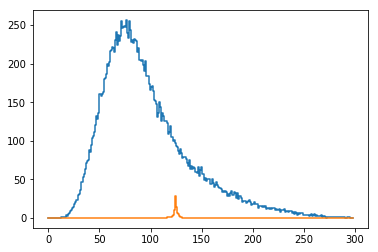

In [10]:
plt.step(histo_qcd[1],histo_qcd[0])
plt.step(histo_higgs[1],histo_higgs[0])

## Problem 2:

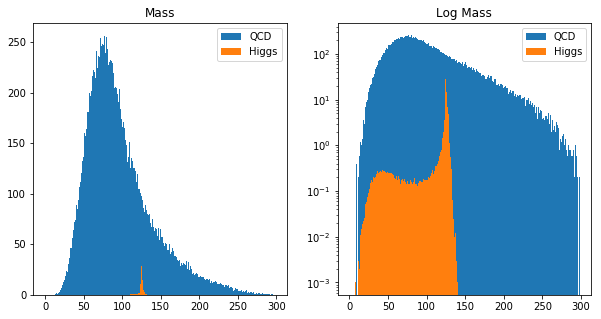

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass')
ax[0].bar(histo_qcd[1],histo_qcd[0],width=1, label = 'QCD')
ax[0].bar(histo_higgs[1],histo_higgs[0] ,width=1, label = 'Higgs')
ax[0].legend()

ax[1].set_title('Log Mass')
ax[1].bar(histo_qcd[1],histo_qcd[0],width=1, label = 'QCD')
ax[1].bar(histo_higgs[1],histo_higgs[0] ,width=1, label = 'Higgs')
ax[1].set_yscale('log')
ax[1].legend();


#plt.step(histo1[1][:-1],histo1[0])
#plt.step(histo[1][:-1],histo[0])

In [12]:
mass_cut_1 = np.where(histo_qcd[1]<133)


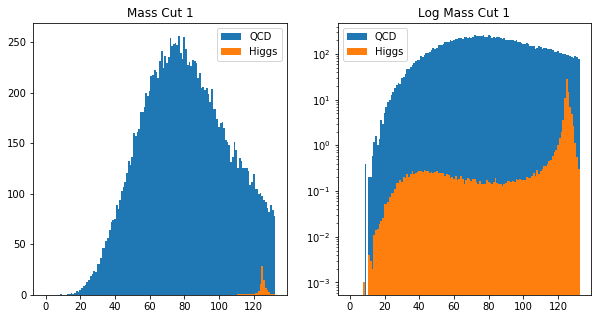

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass Cut 1')
ax[0].bar(histo_qcd[1][mass_cut_1],histo_qcd[0][mass_cut_1],width=1, label = 'QCD')
ax[0].bar(histo_higgs[1][mass_cut_1],histo_higgs[0][mass_cut_1],width=1, label = 'Higgs')
ax[0].legend()

ax[1].set_title('Log Mass Cut 1')
ax[1].bar(histo_qcd[1][mass_cut_1],histo_qcd[0][mass_cut_1],width=1, label = 'QCD')
ax[1].bar(histo_higgs[1][mass_cut_1],histo_higgs[0][mass_cut_1],width=1, label = 'Higgs')
ax[1].set_yscale('log')
ax[1].legend();


In [14]:
#Signifigance
histo_higgs[0][mass_cut_1].sum() / np.sqrt(histo_qcd[0][mass_cut_1].sum())

0.7791712032420911

In [15]:
mass_cut_2 = np.where((histo_qcd[1]<133)&(histo_qcd[1]>119))

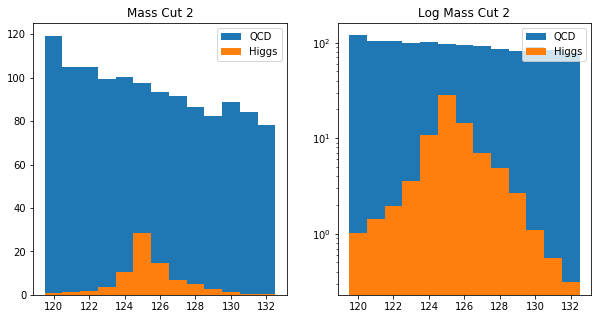

In [16]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Mass Cut 2')
ax[0].bar(histo_qcd[1][mass_cut_2],histo_qcd[0][mass_cut_2],width=1, label = 'QCD')
ax[0].bar(histo_higgs[1][mass_cut_2],histo_higgs[0][mass_cut_2],width=1, label = 'Higgs')
ax[0].legend()

ax[1].set_title('Log Mass Cut 2')
ax[1].bar(histo_qcd[1][mass_cut_2],histo_qcd[0][mass_cut_2],width=1, label = 'QCD')
ax[1].bar(histo_higgs[1][mass_cut_2],histo_higgs[0][mass_cut_2],width=1, label = 'Higgs')
ax[1].set_yscale('log')
ax[1].legend();


In [17]:
#Signifigance
histo_higgs[0][mass_cut_2].sum() / np.sqrt(histo_qcd[0][mass_cut_2].sum())

2.217614594191736

## Problem 3:

In [18]:
def normalizedhistogram(x):
    histo = np.histogram(higgs_table[x],np.arange(higgs_table[x].min(),higgs_table[x].max(),(higgs_table[x].max()-higgs_table[x].min())/200),weights =(100*np.ones(len(higgs_table[x]))/len(higgs_table[x])))
    histo1 = np.histogram(qcd_table[x],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/200),weights=(20000*np.ones(len(qcd_table[x]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    return [histo_higgs,histo_qcd]

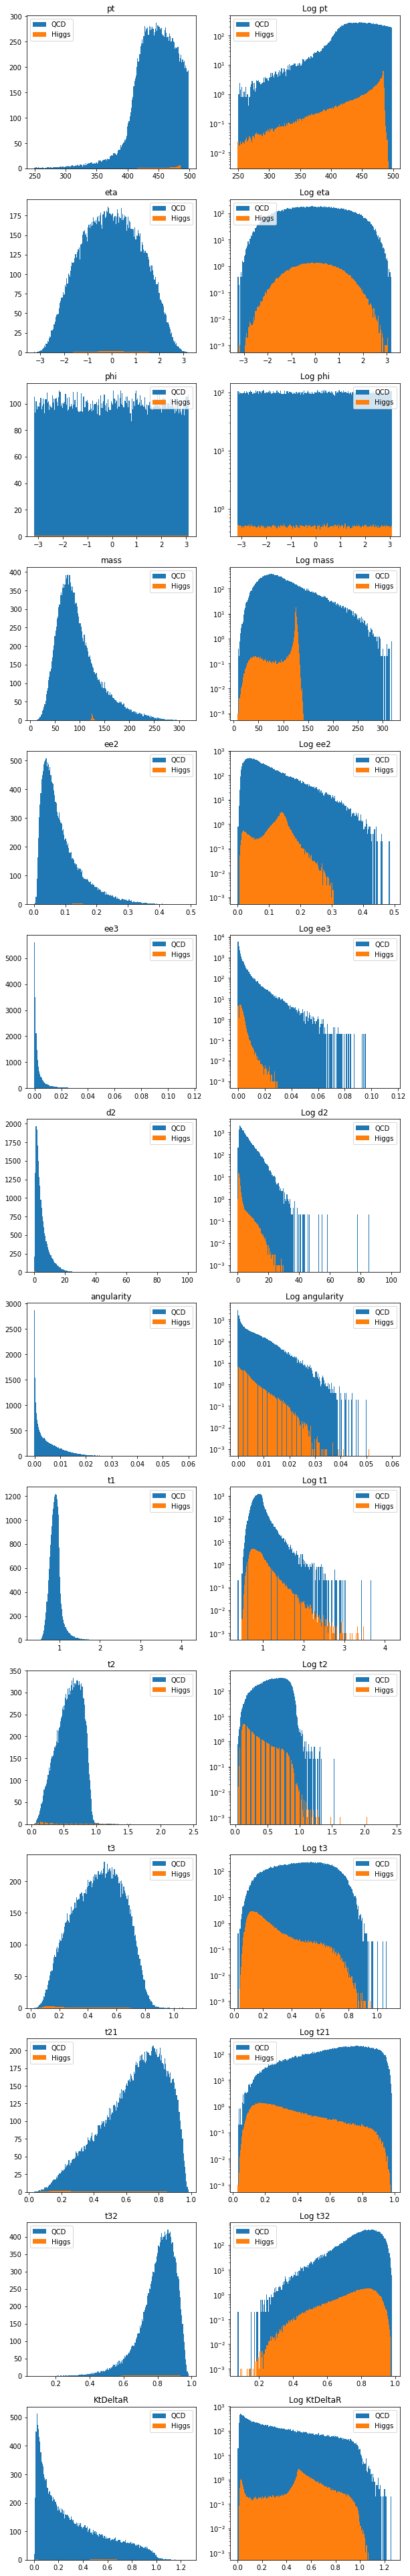

In [20]:
fig,ax = plt.subplots(len(higgs_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(higgs_table.columns)):
    ax[i][0].set_title('{:s}'.format(higgs_table.columns[i]))
    ax[i][0].bar(normalizedhistogram(higgs_table.columns[i])[1][1],normalizedhistogram(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][0].bar(normalizedhistogram(higgs_table.columns[i])[0][1],normalizedhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(higgs_table.columns[i]))
    ax[i][1].bar(normalizedhistogram(higgs_table.columns[i])[1][1],normalizedhistogram(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][1].bar(normalizedhistogram(higgs_table.columns[i])[0][1],normalizedhistogram(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][1].set_yscale('log')
    ax[i][1].legend();

In [51]:
def normalizedhistogrammasscuts(x):
    mass_cut_higgs = np.where((higgs_table['mass']<133)&(higgs_table['mass']>119))
    mass_cut_qcd = np.where((qcd_table['mass']<133)&(qcd_table['mass']>119))
    
    histo = np.histogram(np.array(higgs_table[x])[mass_cut_higgs],np.arange(higgs_table[x].min(),higgs_table[x].max(),(higgs_table[x].max()-higgs_table[x].min())/200),weights =(100*np.ones(len(np.array(higgs_table[x])[mass_cut_higgs]))/len(higgs_table[x])))
    histo1 = np.histogram(np.array(qcd_table[x])[mass_cut_qcd],np.arange(qcd_table[x].min(),qcd_table[x].max(),(qcd_table[x].max()-qcd_table[x].min())/200),weights=(20000*np.ones(len(np.array(qcd_table[x])[mass_cut_qcd]))/len(qcd_table[x])))

    histo_higgs = np.array([histo[0],histo[1][:-1]])
    histo_qcd = np.array([histo1[0],histo1[1][:-1]])
    
    return [histo_higgs,histo_qcd]

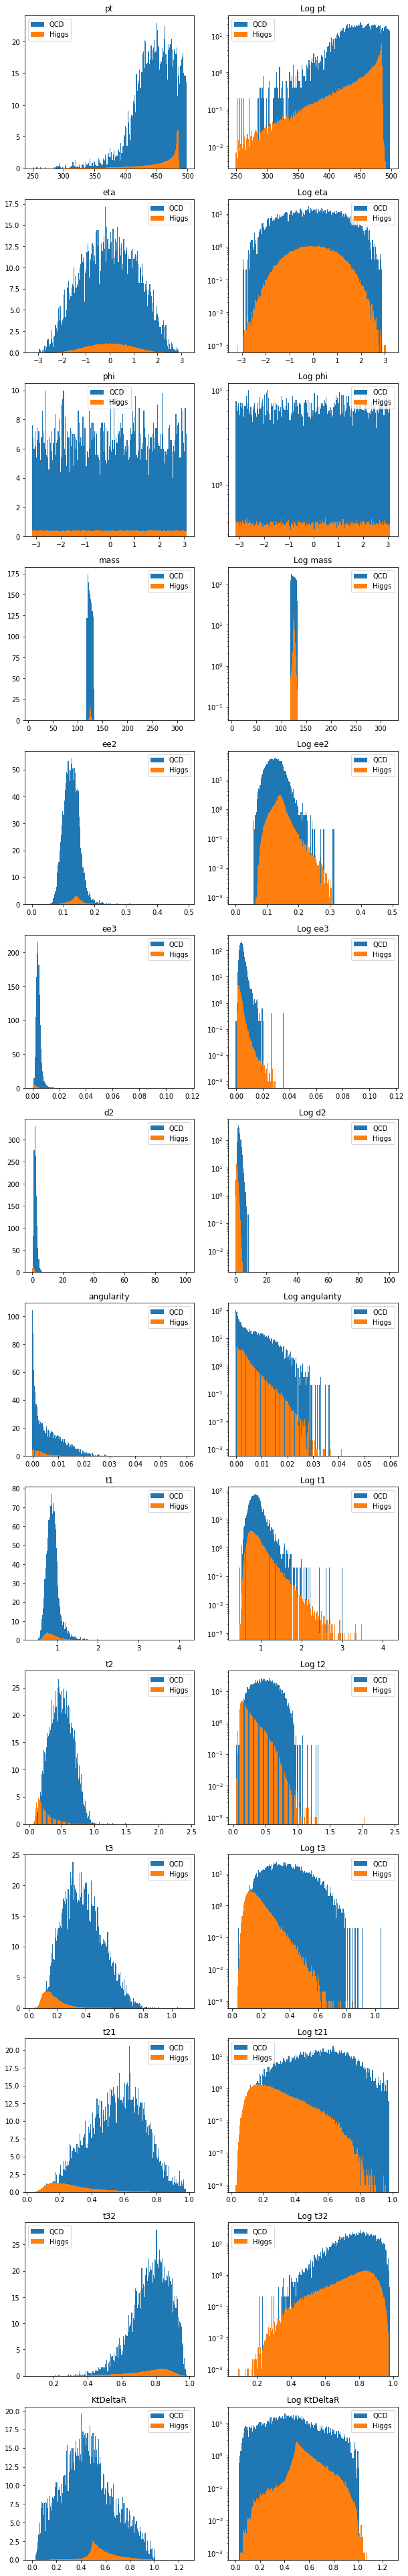

In [52]:
fig,ax = plt.subplots(len(higgs_table.columns),2,figsize=(10,70))

for i in np.arange(0,len(higgs_table.columns)):
    ax[i][0].set_title('{:s}'.format(higgs_table.columns[i]))
    ax[i][0].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[1][1],normalizedhistogrammasscuts(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][0].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[0][1],normalizedhistogrammasscuts(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][0].legend()

    ax[i][1].set_title('Log {:s}'.format(higgs_table.columns[i]))
    ax[i][1].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[1][1],normalizedhistogrammasscuts(higgs_table.columns[i])[1][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'QCD')
    ax[i][1].bar(normalizedhistogrammasscuts(higgs_table.columns[i])[0][1],normalizedhistogrammasscuts(higgs_table.columns[i])[0][0],width=(qcd_table[higgs_table.columns[i]].max()-qcd_table[higgs_table.columns[i]].min())/200, label = 'Higgs')
    ax[i][1].set_yscale('log')
    ax[i][1].legend();

array([125.15036485, 130.55267215, 125.7030631 , ..., 125.62912655,
       125.70730161, 129.74990623])

[(array([    0,     1,     2, ..., 99994, 99995, 99996], dtype=int64),)]